# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

I'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [41]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [17]:
#set data duration: 1/1/2006 t0 1/1/2016
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [18]:
#Get data through Yahoo Finance
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [20]:
#check data
C.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,440.882477
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870900.0,432.742950
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143100.0,434.889679


In [23]:
#Create tickers for later used in DataFrame
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [26]:
#Create new DataFrame by concat all bannks data
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [27]:
#Check data
bank_stocks

Bank Ticker        BAC                        ...        WFC                       
Stock Info        High        Low       Open  ...      Close      Volume  Adj Close
Date                                          ...                                  
2006-01-03   47.180000  46.150002  46.919998  ...  31.900000  11016400.0  20.408512
2006-01-04   47.240002  46.450001  47.000000  ...  31.530001  10870000.0  20.171795
2006-01-05   46.830002  46.320000  46.580002  ...  31.495001  10158000.0  20.149401
2006-01-06   46.910000  46.349998  46.799999  ...  31.680000   8403800.0  20.267757
2006-01-09   46.970001  46.360001  46.720001  ...  31.674999   5619600.0  20.264565
...                ...        ...        ...  ...        ...         ...        ...
2015-12-24   17.379999  17.219999  17.320000  ...  54.820000   4999400.0  46.785397
2015-12-28   17.230000  16.980000  17.219999  ...  54.680000   8288800.0  46.665909
2015-12-29   17.350000  17.160000  17.250000  ...  55.290001   7894900.0  47.186504
2015-12-30   17.240000  17.040001  17.200001  ...  54.889999   8016900.0  46.845135
2015-12-31   17.070000  16.830000  17.010000  ...  54.360001  10929800.0  46.392815

[2517 rows x 36 columns]

Now DataFrame bank_stocks is created and ready for further analysis

In [28]:
# First let's see each bank's highest closing price in this time period
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

Finding: CitiGroup had the highest Close Price compared with all other banks

In [30]:
#Let's create a return Data Frame of these banks stock price

returns = pd.DataFrame()

for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


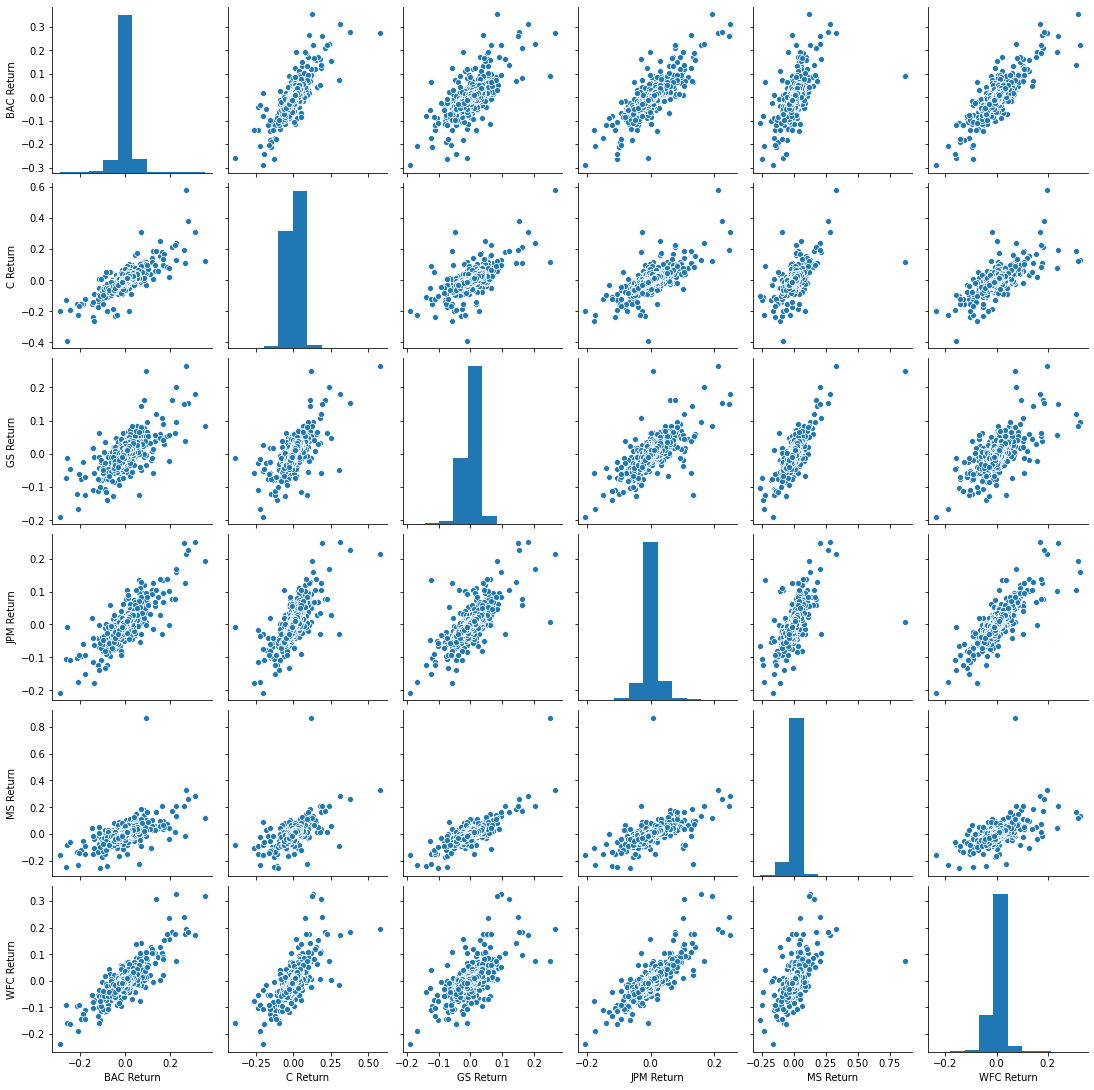

In [31]:
#Create a pairplot to compare Returns performance for these banks

import seaborn as sns
sns.pairplot(returns[1:])

**Finding:** 

Among all these banks Morgan Stanley is the one stood out with its graphs. Their returns is not as good as its competitors and it was probably due to the Financial Crisis of 2007-2010, where Morgan Stanley is said to have lost over 80% of its market value betweeon 2007 and 2008.

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [32]:
# Let's check when is the worst drop for the banks in Returns

returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**Finding:**

4 out of these 6 banks have the worst day on 2009/01/20*. 


*Note: I did some researches on what happened on this day and it turns out 2009/01/20 was President Obama Inaugurated Day. Probably just co-incident.

In [33]:
# Let's check when is the biggest gain for the banks in Returns
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**Finding:**

2 banks (Citi and Golman Sachs) are having the same day 2008-11-24 as biggest gain day. 

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [37]:
#Check which bank is the riskiest over the entire time period by using Standard Deviation
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

Finding: Citi is the riskiest

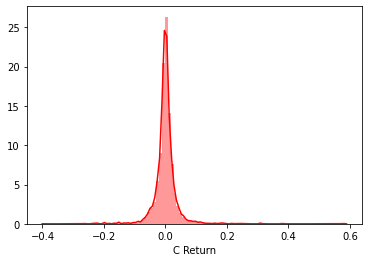

In [36]:
#Further data to analyze on Citi
sns.distplot(returns['C Return'],color='red',bins=100)

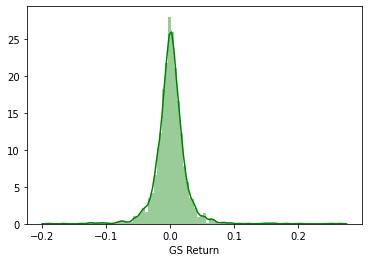

In [40]:
# Compared with Golman Sachs, which is the lowest risk
sns.distplot(returns['GS Return'],color='green',bins=100)

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

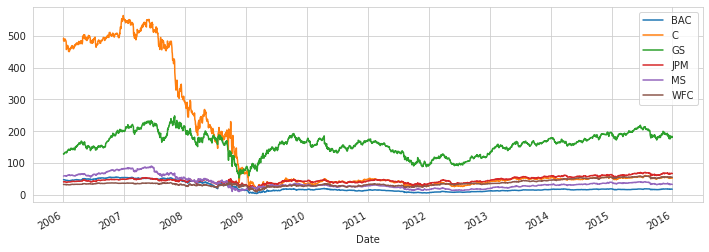

In [46]:
#Create a line plot to display Close Price for each bank and see how they performed
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

**Finding:**

1. Citi experienced the biggest crash from 2007 to 2009, which mirror with our analysis regarding its riskiest and worse performing within those timing
2. Goldman Sachs also experience big drop in 2008, but was able to climb back to previous level in 2009. The rebound would be caused by Fed provided overnight loans to Goldman Sachs ($538 billion total)

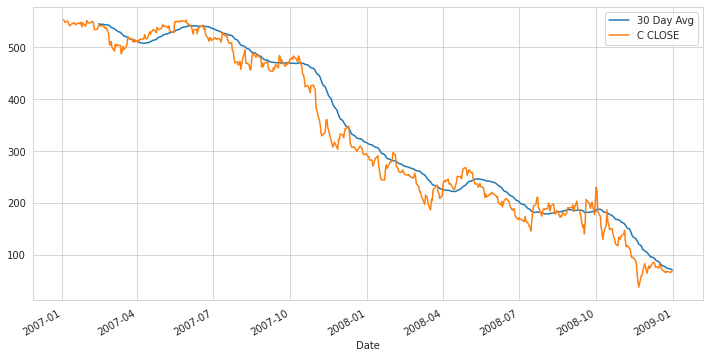

In [47]:
#Comparing Citi Close Price with 30 days avg within the time frame
plt.figure(figsize=(12,6))
C['Close'].loc['2007-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
C['Close'].loc['2007-01-01':'2009-01-01'].plot(label='C CLOSE')
plt.legend()

Finding: the stock performed worst than 30 Day average as expected

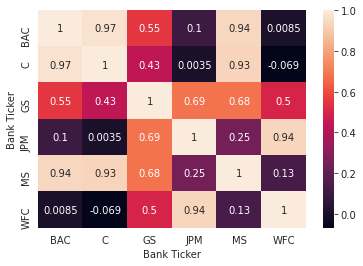

In [50]:
#Checking on correlations between the stocks Close Price
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

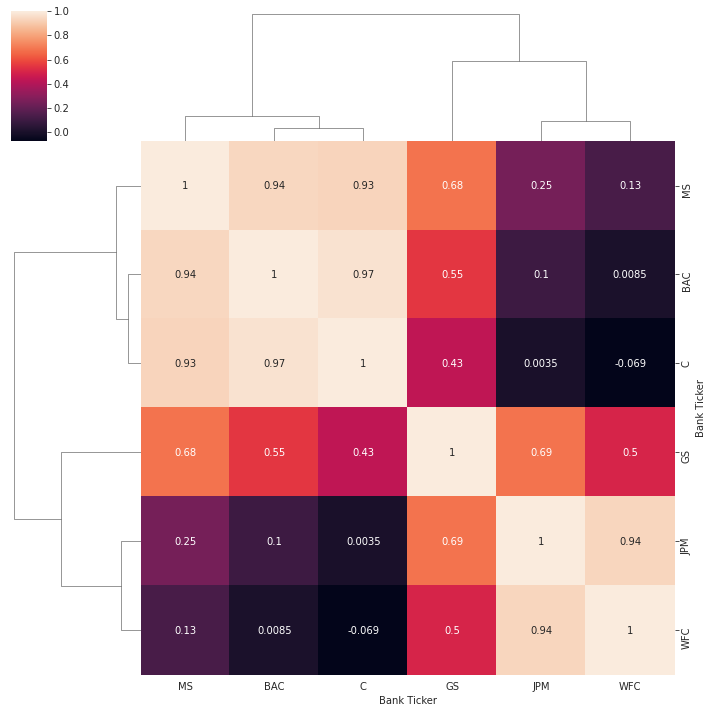

In [49]:
#Another view of correlations by using clustermap
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**Findings:**

1. The data put WCF, JPM, and GS as 1 group, while MS, BAC, and C as another
2. Among these banks, GS has the average correlations with other banks (around 0.5 - 0.6)
3. Seeing very low correlation between C and JPM, but highest is C with BAC
4. Other strong correlations are MS & BAC, MS & C, JPM & WFC